<a href="https://colab.research.google.com/github/AmitSP-beep/Mutual-Fund-Risk-Classification/blob/main/Mutual_Fund.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
!pip install --upgrade scikit-learn



In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
df=pd.read_csv('/content/drive/MyDrive/datasets/comprehensive_mutual_funds_data.csv')
df.replace('-',np.nan,inplace=True)
df.iloc[7, : ]

,7
scheme_name,Aditya Birla SL CEF – Global Agri Plan-Direct ...
min_sip,1000
min_lumpsum,1000
expense_ratio,1.29
fund_size_cr,15.0
fund_age_yr,10
fund_manager,Vinod Narayan Bhat
sortino,1.42
alpha,NaN
sd,20.18


In [164]:
col_na=df.columns[df.isna().any()].tolist()
col_na
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
df[col_na]=imputer.fit_transform(df[col_na])


In [165]:
bins = [0, 2, 4, 6]
labels = ['Low', 'Medium', 'High']
df['risk_level_category'] = pd.cut(df['risk_level'], bins=bins, labels=labels, right=True)
df

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,...,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr,risk_level_category
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,...,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.90,Medium
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,...,1.10,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.50,Low
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,...,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.70,High
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,...,0.90,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,9.10,High
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,...,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.70,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,UTI-Unit Linked Insurance Plan – Direct,500,15000,0.96,5068.0,10,Amandeep Chopra,2.47,0.92,7.06,...,1.29,4,UTI Mutual Fund,0,Hybrid,Dynamic Asset Allocation or Balanced Advantage,-0.7,13.1,6.20,Medium
810,UTI-Value Opportunities Fund,500,5000,1.16,6740.0,10,Vetri Subramaniam,3.21,2.73,15.62,...,1.48,6,UTI Mutual Fund,4,Equity,Value Funds,1.7,27.2,12.20,High
811,WhiteOak Capital Liquid Fund,500,500,0.26,197.0,4,Piyush Baranwal,-0.42,0.93,0.39,...,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Liquid Mutual Funds,5.3,3.8,4.06,Low
812,WhiteOak Capital Overnight Fund,500,500,0.22,14.0,4,Piyush Baranwal,-0.42,0.93,0.39,...,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Overnight Mutual Funds,1.7,32.4,13.30,Low


In [166]:
df.isna().sum()

,0
scheme_name,0
min_sip,0
min_lumpsum,0
expense_ratio,0
fund_size_cr,0
fund_age_yr,0
fund_manager,0
sortino,0
alpha,0
sd,0


In [167]:
df2=df

In [168]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

ohe = OneHotEncoder(sparse_output=False, drop='first')
category_encoded = ohe.fit_transform(df2[['category']])
category_encoded_df = pd.DataFrame(category_encoded, columns=ohe.get_feature_names_out(['category']))
df2 = pd.concat([df2, category_encoded_df], axis=1)
df2.drop('category', axis=1, inplace=True)


In [169]:
df_numric=df2.drop(['scheme_name','fund_manager','amc_name','sub_category','risk_level_category'],axis=1)
df_numric

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,risk_level,rating,returns_1yr,returns_3yr,returns_5yr,category_Equity,category_Hybrid,category_Other,category_Solution Oriented
0,100,100,0.27,10.0,10,0.32,2.24,9.39,0.01,0.24,3,3,4.0,6.5,6.90,0.0,0.0,1.0,0.0
1,1000,1000,0.36,4288.0,10,1.33,1.53,0.72,0.56,1.10,1,3,5.6,4.8,5.50,0.0,1.0,0.0,0.0
2,1000,1000,0.53,157.0,10,3.44,2.67,10.58,0.67,1.42,5,3,2.0,18.9,9.70,0.0,0.0,1.0,0.0
3,500,1000,0.76,637.0,4,2.18,-6.37,14.99,0.85,0.90,6,2,-0.7,17.1,9.10,0.0,0.0,0.0,1.0
4,100,100,0.61,6386.0,10,3.69,1.99,10.38,0.68,1.39,6,4,4.5,18.6,9.70,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,500,15000,0.96,5068.0,10,2.47,0.92,7.06,0.44,1.29,4,0,-0.7,13.1,6.20,0.0,1.0,0.0,0.0
810,500,5000,1.16,6740.0,10,3.21,2.73,15.62,0.90,1.48,6,4,1.7,27.2,12.20,1.0,0.0,0.0,0.0
811,500,500,0.26,197.0,4,-0.42,0.93,0.39,0.72,-0.07,1,1,5.3,3.8,4.06,0.0,0.0,0.0,0.0
812,500,500,0.22,14.0,4,-0.42,0.93,0.39,0.72,-0.07,1,1,1.7,32.4,13.30,0.0,0.0,0.0,0.0


In [170]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_numric=pd.DataFrame(scaler.fit_transform(df_numric),columns=df_numric.columns)
df_numric

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,risk_level,rating,returns_1yr,returns_3yr,returns_5yr,category_Equity,category_Hybrid,category_Other,category_Solution Oriented
0,-0.470588,-1.088889,-0.479167,-0.255369,0.0,-1.520362,0.114907,-0.173898,-3.36,-1.728395,-1.000000,0.0,-0.097561,-0.580935,-0.405530,0.0,0.0,1.0,0.0
1,0.588235,-0.888889,-0.354167,0.918696,0.0,-0.911011,-0.105590,-0.785538,-1.16,-0.312757,-1.666667,0.0,0.292683,-0.663060,-0.663594,0.0,1.0,0.0,0.0
2,0.588235,-0.888889,-0.118056,-0.215026,0.0,0.361991,0.248447,-0.089947,-0.72,0.213992,-0.333333,0.0,-0.585366,0.018099,0.110599,0.0,0.0,1.0,0.0
3,0.000000,-0.888889,0.201389,-0.083293,-1.5,-0.398190,-2.559006,0.221164,0.00,-0.641975,0.000000,-0.5,-1.243902,-0.068857,0.000000,0.0,0.0,0.0,1.0
4,-0.470588,-1.088889,-0.006944,1.494477,0.0,0.512821,0.037267,-0.104056,-0.68,0.164609,0.000000,0.5,0.024390,0.003606,0.110599,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,0.000000,2.222222,0.479167,1.132762,0.0,-0.223228,-0.295031,-0.338272,-1.64,0.000000,-0.666667,-1.5,-1.243902,-0.262094,-0.534562,0.0,1.0,0.0,0.0
810,0.000000,0.000000,0.756944,1.591630,0.0,0.223228,0.267081,0.265608,0.20,0.312757,0.000000,0.5,-0.658537,0.419065,0.571429,1.0,0.0,0.0,0.0
811,0.000000,-1.000000,-0.493056,-0.204048,-1.5,-1.966817,-0.291925,-0.808818,-0.52,-2.238683,-1.666667,-1.0,0.219512,-0.711369,-0.929032,0.0,0.0,0.0,0.0
812,0.000000,-1.000000,-0.548611,-0.254271,-1.5,-1.966817,-0.291925,-0.808818,-0.52,-2.238683,-1.666667,-1.0,-0.658537,0.670273,0.774194,0.0,0.0,0.0,0.0


In [171]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_numric['risk_level_category']=le.fit_transform(df['risk_level_category'])
y=df_numric['risk_level_category']


In [172]:
df

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,...,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr,risk_level_category
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,...,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.90,Medium
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,...,1.10,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.50,Low
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,...,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.70,High
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,...,0.90,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,9.10,High
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,...,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.70,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,UTI-Unit Linked Insurance Plan – Direct,500,15000,0.96,5068.0,10,Amandeep Chopra,2.47,0.92,7.06,...,1.29,4,UTI Mutual Fund,0,Hybrid,Dynamic Asset Allocation or Balanced Advantage,-0.7,13.1,6.20,Medium
810,UTI-Value Opportunities Fund,500,5000,1.16,6740.0,10,Vetri Subramaniam,3.21,2.73,15.62,...,1.48,6,UTI Mutual Fund,4,Equity,Value Funds,1.7,27.2,12.20,High
811,WhiteOak Capital Liquid Fund,500,500,0.26,197.0,4,Piyush Baranwal,-0.42,0.93,0.39,...,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Liquid Mutual Funds,5.3,3.8,4.06,Low
812,WhiteOak Capital Overnight Fund,500,500,0.22,14.0,4,Piyush Baranwal,-0.42,0.93,0.39,...,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Overnight Mutual Funds,1.7,32.4,13.30,Low


<ipython-input-173-7be2691bfe13>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_returns = df.groupby('risk_level_category')[["returns_1yr", "returns_3yr", "returns_5yr"]].mean()


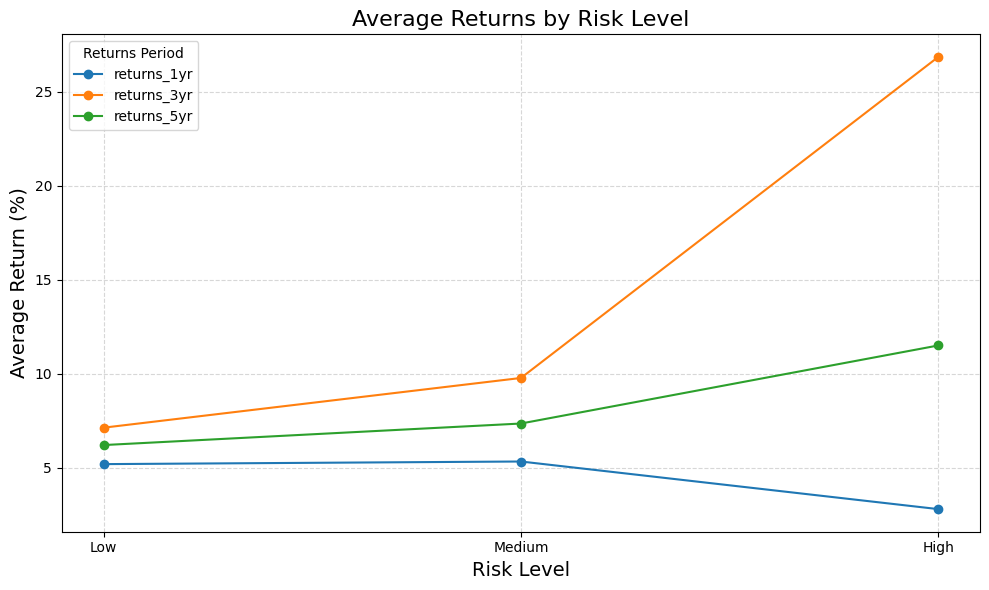

In [173]:
avg_returns = df.groupby('risk_level_category')[["returns_1yr", "returns_3yr", "returns_5yr"]].mean()

plt.figure(figsize=(10, 6))
for column in avg_returns.columns:
    plt.plot(avg_returns.index, avg_returns[column], label=column, marker='o')

plt.title('Average Returns by Risk Level', fontsize=16)
plt.xlabel('Risk Level', fontsize=14)
plt.ylabel('Average Return (%)', fontsize=14)
plt.legend(title="Returns Period")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

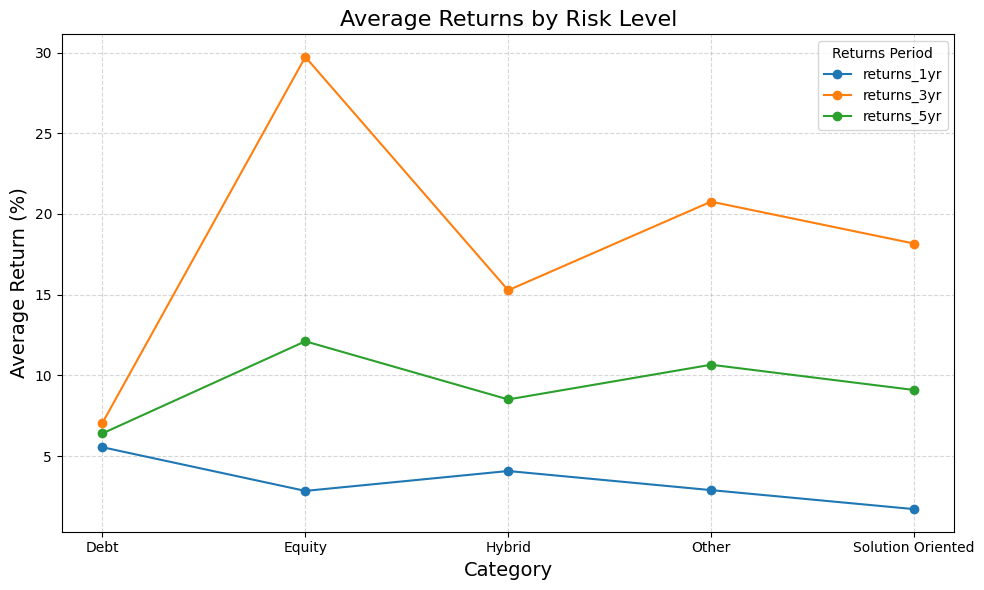

In [174]:
avg_returns = df.groupby('category')[["returns_1yr", "returns_3yr", "returns_5yr"]].mean()

plt.figure(figsize=(10, 6))
for column in avg_returns.columns:
    plt.plot(avg_returns.index, avg_returns[column], label=column, marker='o')

plt.title('Average Returns by Risk Level', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Return (%)', fontsize=14)
plt.legend(title="Returns Period")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

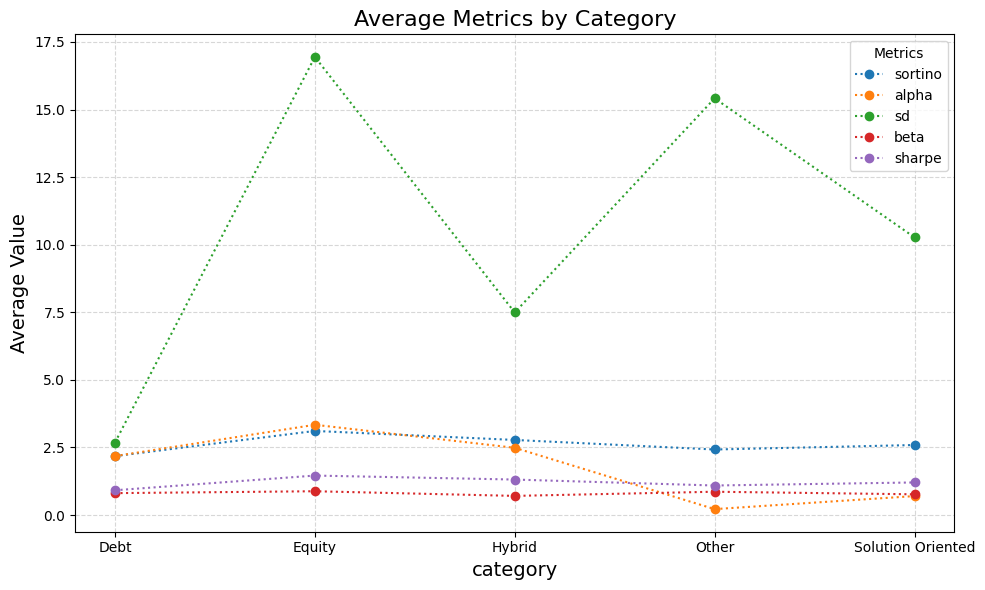

In [175]:
avg_metrics = df.groupby('category')[["sortino", "alpha", "sd", "beta", "sharpe"]].mean()

plt.figure(figsize=(10, 6))
for column in avg_metrics.columns:
    plt.plot(avg_metrics.index, avg_metrics[column],linestyle=':', label=column, marker='o')

plt.title('Average Metrics by Category', fontsize=16)
plt.xlabel('category', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.legend(title="Metrics")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<ipython-input-176-0445faa0e8f2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_metrics = df.groupby('risk_level_category')[["sortino", "alpha", "sd", "beta", "sharpe"]].mean()


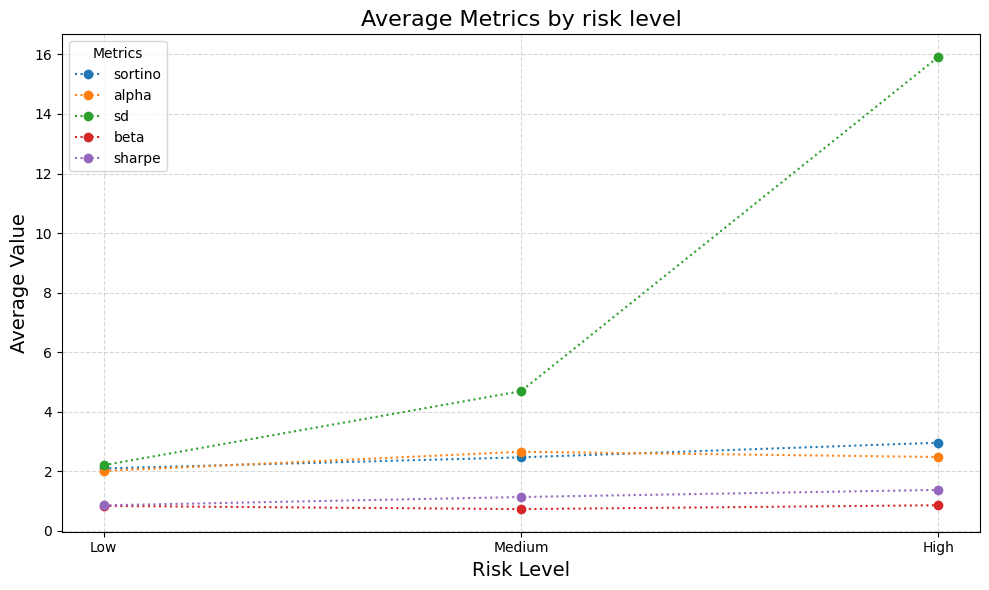

In [176]:
avg_metrics = df.groupby('risk_level_category')[["sortino", "alpha", "sd", "beta", "sharpe"]].mean()

plt.figure(figsize=(10, 6))
for column in avg_metrics.columns:
    plt.plot(avg_metrics.index, avg_metrics[column],linestyle=':', label=column, marker='o')

plt.title('Average Metrics by risk level', fontsize=16)
plt.xlabel('Risk Level', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.legend(title="Metrics")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<ipython-input-177-8fdf5a353c3f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_metrics = df.groupby('risk_level_category')[['rating']].mean()


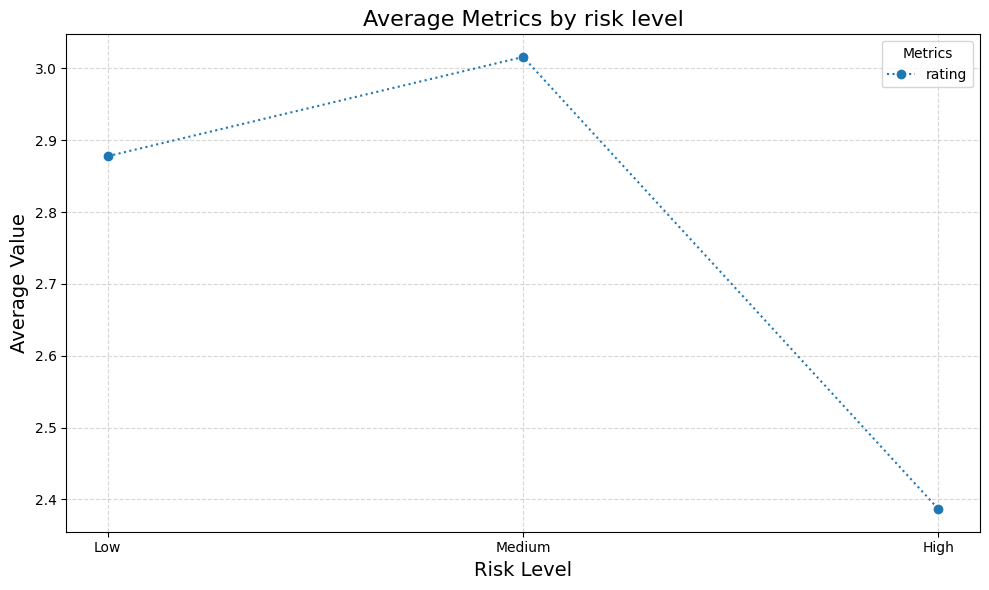

In [177]:
avg_metrics = df.groupby('risk_level_category')[['rating']].mean()

plt.figure(figsize=(10, 6))
for column in avg_metrics.columns:
    plt.plot(avg_metrics.index, avg_metrics[column],linestyle=':', label=column, marker='o')

plt.title('Average Metrics by risk level', fontsize=16)
plt.xlabel('Risk Level', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.legend(title="Metrics")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<ipython-input-178-389443f3325b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_metrics = df.groupby('risk_level_category')[['min_sip']].mean()


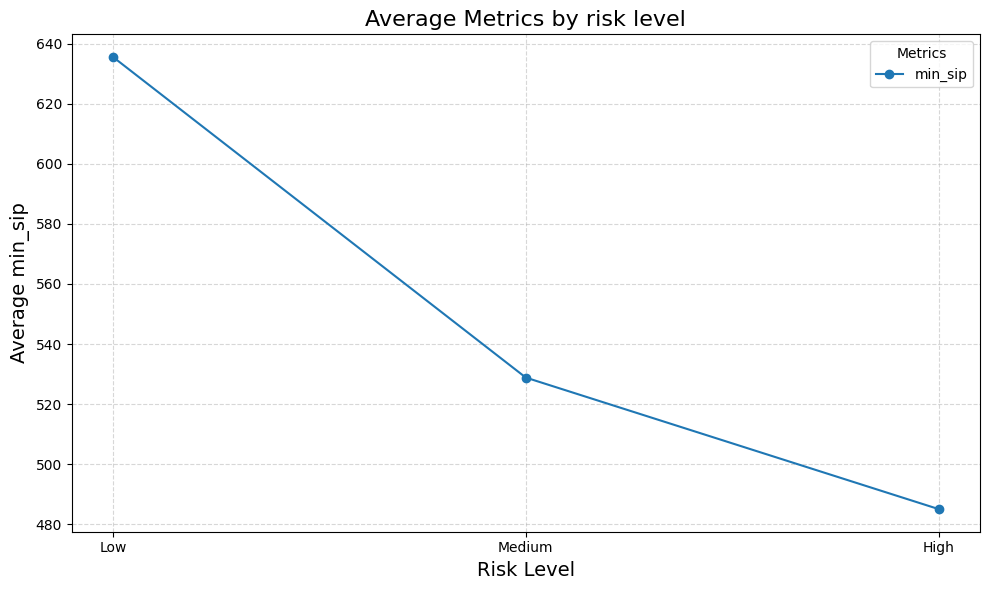

In [178]:
avg_metrics = df.groupby('risk_level_category')[['min_sip']].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_metrics.index, avg_metrics['min_sip'],linestyle='-', label='min_sip', marker='o')

plt.title('Average Metrics by risk level', fontsize=16)
plt.xlabel('Risk Level', fontsize=14)
plt.ylabel('Average min_sip', fontsize=14)
plt.legend(title="Metrics")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<ipython-input-179-460be23b9b2b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_metrics = df.groupby('risk_level_category')[['expense_ratio']].mean()


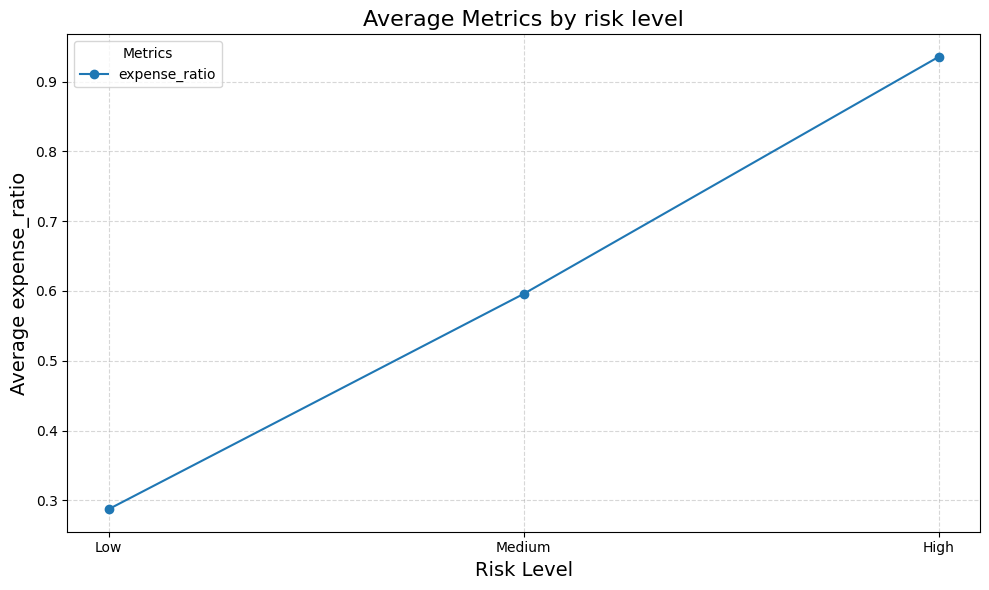

In [179]:
avg_metrics = df.groupby('risk_level_category')[['expense_ratio']].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_metrics.index, avg_metrics['expense_ratio'],linestyle='-', label='expense_ratio', marker='o')

plt.title('Average Metrics by risk level', fontsize=16)
plt.xlabel('Risk Level', fontsize=14)
plt.ylabel('Average expense_ratio', fontsize=14)
plt.legend(title="Metrics")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<ipython-input-180-561d1eb492cf>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_metrics = df.groupby('risk_level_category')[['fund_size_cr']].mean()


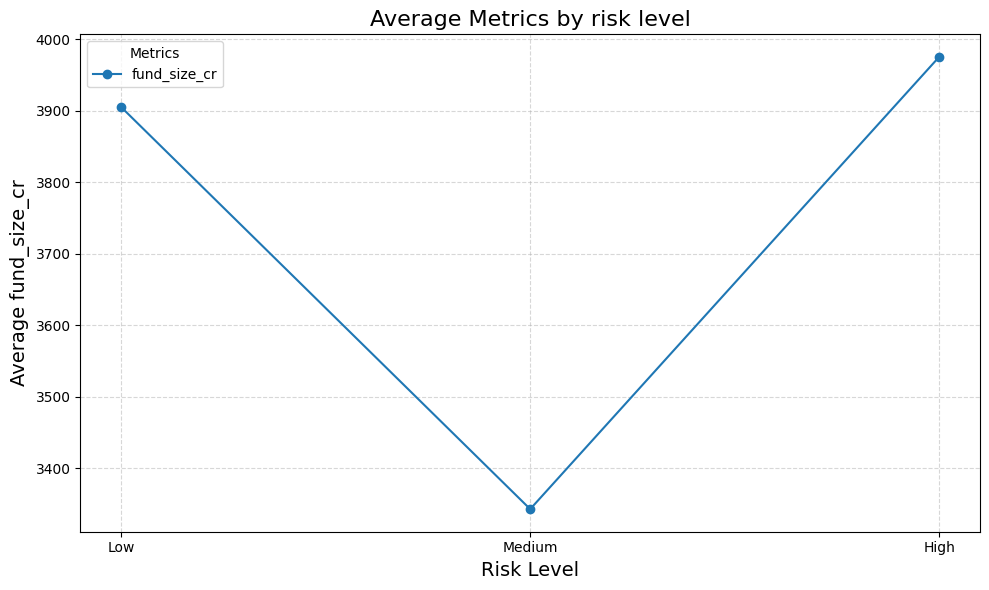

In [180]:
avg_metrics = df.groupby('risk_level_category')[['fund_size_cr']].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_metrics.index, avg_metrics['fund_size_cr'],linestyle='-', label='fund_size_cr', marker='o')

plt.title('Average Metrics by risk level', fontsize=16)
plt.xlabel('Risk Level', fontsize=14)
plt.ylabel('Average fund_size_cr', fontsize=14)
plt.legend(title="Metrics")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [191]:
x=df_numric.drop(['risk_level_category','risk_level'],axis=1)
y=df_numric['risk_level_category']

In [193]:
x


,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,rating,returns_1yr,returns_3yr,returns_5yr,category_Equity,category_Hybrid,category_Other,category_Solution Oriented
0,-0.470588,-1.088889,-0.479167,-0.255369,0.0,-1.520362,0.114907,-0.173898,-3.36,-1.728395,0.0,-0.097561,-0.580935,-0.405530,0.0,0.0,1.0,0.0
1,0.588235,-0.888889,-0.354167,0.918696,0.0,-0.911011,-0.105590,-0.785538,-1.16,-0.312757,0.0,0.292683,-0.663060,-0.663594,0.0,1.0,0.0,0.0
2,0.588235,-0.888889,-0.118056,-0.215026,0.0,0.361991,0.248447,-0.089947,-0.72,0.213992,0.0,-0.585366,0.018099,0.110599,0.0,0.0,1.0,0.0
3,0.000000,-0.888889,0.201389,-0.083293,-1.5,-0.398190,-2.559006,0.221164,0.00,-0.641975,-0.5,-1.243902,-0.068857,0.000000,0.0,0.0,0.0,1.0
4,-0.470588,-1.088889,-0.006944,1.494477,0.0,0.512821,0.037267,-0.104056,-0.68,0.164609,0.5,0.024390,0.003606,0.110599,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,0.000000,2.222222,0.479167,1.132762,0.0,-0.223228,-0.295031,-0.338272,-1.64,0.000000,-1.5,-1.243902,-0.262094,-0.534562,0.0,1.0,0.0,0.0
810,0.000000,0.000000,0.756944,1.591630,0.0,0.223228,0.267081,0.265608,0.20,0.312757,0.5,-0.658537,0.419065,0.571429,1.0,0.0,0.0,0.0
811,0.000000,-1.000000,-0.493056,-0.204048,-1.5,-1.966817,-0.291925,-0.808818,-0.52,-2.238683,-1.0,0.219512,-0.711369,-0.929032,0.0,0.0,0.0,0.0
812,0.000000,-1.000000,-0.548611,-0.254271,-1.5,-1.966817,-0.291925,-0.808818,-0.52,-2.238683,-1.0,-0.658537,0.670273,0.774194,0.0,0.0,0.0,0.0


In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [205]:
lr=LogisticRegression(max_iter=10000)
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
svm=SVC()

In [206]:
estimators=[('lr',lr),('dt',dt),('rf',rf),('knn',knn),('svm',svm)]

# Individual Model Performence

In [220]:
for estimator in estimators :
    score=cross_val_score(estimator[1],x,y,cv=10,scoring='accuracy')
    print(estimator[0], ' has accuracy of :',np.round(np.mean(score),4))

lr  has accuracy of : 0.8316
dt  has accuracy of : 0.8219
rf  has accuracy of : 0.8623
knn  has accuracy of : 0.8267
svm  has accuracy of : 0.8476


# Hyperparameter Tuning of each Classifier

**Logistic Regression**

In [208]:
param_grid_lr ={
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1,0.5,1,2],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}
gd_lr=GridSearchCV(lr,param_grid_lr,cv=7,scoring='accuracy')
gd_lr.fit(x,y)
print('Best choice of parameters can be :',gd_lr.best_params_)
print("Best score with these parameters will be :",gd_lr.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
308 fits failed out of a total of 448.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

Best choice of parameters can be : {'C': 0.5, 'penalty': 'l2', 'solver': 'saga'}
Best score with these parameters will be : 0.8390594080249253


**Decision Tree**

In [212]:
param_grid_dt={
    'criterion':['gini','entropy'],
    'max_depth':[None,5,10,20,30],
    'min_samples_split':[2,5,10],
     'splitter'  : ['best','random'],
    'max_features':['sqrt','log2',None]


}
gd_dt=GridSearchCV(dt,param_grid_dt,cv=7,scoring='accuracy')
gd_dt.fit(x,y)
print('Best choice of parameters can be :',gd_dt.best_params_)
print("Best score with these parameters will be :",gd_dt.best_score_)


Best choice of parameters can be : {'criterion': 'entropy', 'max_depth': 30, 'max_features': None, 'min_samples_split': 10, 'splitter': 'random'}
Best score with these parameters will be : 0.8414382552313586


**Random Forest**

In [215]:
param_grid_rf={
    'n_estimators':[5,10,20,30],
    'criterion':['gini','entropy'],
    'max_depth':[None,5,10,20,30],
    'min_samples_split':[2,5,10],
    'max_features':['sqrt','log2',None],
    'bootstrap':[True,False]
}
gd_rf=GridSearchCV(rf,param_grid_rf,cv=7,scoring='accuracy')
gd_rf.fit(x,y)
print('Best choice of parameters can be :',gd_rf.best_params_)
print("Best score with these parameters will be :",gd_rf.best_score_)

Best choice of parameters can be : {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 10}
Best score with these parameters will be : 0.8698054818744474


**KNN**

In [221]:
param_grid_knn={
    'n_neighbors':[4,5,10,12,15,20],
    'weights':['uniform','distance']

}

gd_knn=GridSearchCV(knn,param_grid_knn,cv=7,scoring='accuracy')
gd_knn.fit(x,y)
print("Best choice of parameters can be:",gd_knn.best_params_)
print("With maximum score using KNN :",gd_knn.best_score_)

Best choice of parameters can be: {'n_neighbors': 15, 'weights': 'distance'}
With maximum score using KNN : 0.8390067786619511


**SVM**

In [223]:
# @title
param_grid_svm={
    'C':[0.1,0.5,1,2,3],
    'kernel':['linear','poly','rbf','sigmoid']
}
gd_svm=GridSearchCV(SVC(),param_grid_svm,cv=7,scoring='accuracy')
gd_svm.fit(x,y)
print("Best choice of parameters can be:",gd_svm.best_params_)
print("With maximum score using SVC :",gd_svm.best_score_)

Best choice of parameters can be: {'C': 2, 'kernel': 'rbf'}
With maximum score using SVC : 0.8488484695381249
